In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Process 관련 변수
df_process_raw = pd.read_csv("C:/python/데이터셋/bat_process.csv", encoding ='euc-kr', low_memory=False)
# 시간 관련 변수
df_tat_raw=pd.read_csv("C:/python/데이터셋/bat_tat.csv", encoding='euc-kr', low_memory=False)

In [29]:
# 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
matplotlib.rcParams['font.family']='NanumGothic'

In [4]:
df_process_raw.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'rta1_cell_no',
       'rta1_box_col', 'rta1_box_row', 'rta1_box_dan', 'hta1_box_col',
       ...
       'sa3_box_row', 'sa3_box_dan', 'socv3_ocv', 'ocv2_deltaocv',
       'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=109)

In [7]:
df_rta2 = df_process_raw[['judge', 'rta2_box_col', 'rta2_box_row', 'rta2_box_dan']]

In [8]:
df_rta2.head()

,judge,rta2_box_col,rta2_box_row,rta2_box_dan
0,양품,04열,64연,06단
1,양품,04열,64연,06단
2,양품,04열,64연,06단
3,양품,04열,64연,06단
4,양품,04열,64연,06단


In [13]:
df_tot = df_rta2.groupby(['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'], as_index=False).count()
df_tot.rename(columns={'judge': 'count'}, inplace=True)
df_tot.head()

,rta2_box_col,rta2_box_row,rta2_box_dan,count
0,01열,01연,02단,50
1,01열,01연,08단,48
2,01열,01연,10단,50
3,01열,02연,02단,48
4,01열,02연,05단,50


In [17]:
df_error=df_rta2[df_rta2['judge']=='불량']
df_error=df_error.groupby(['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'], as_index=False).count()
df_error.rename(columns={'judge' : 'error_count'}, inplace=True)
df_error.head()

,rta2_box_col,rta2_box_row,rta2_box_dan,error_count
0,01열,02연,02단,2
1,01열,06연,09단,4
2,01열,07연,05단,5
3,01열,07연,08단,2
4,01열,10연,05단,30


In [19]:
df_error.isnull().sum()

rta2_box_col    0
rta2_box_row    0
rta2_box_dan    0
error_count     0
dtype: int64

In [21]:
df_error.describe(include='all')

,rta2_box_col,rta2_box_row,rta2_box_dan,error_count
count,335,335,335,335.000000
unique,8,64,11,NaN
top,05열,10연,07단,NaN
freq,57,11,42,NaN
mean,NaN,NaN,NaN,4.104478
std,NaN,NaN,NaN,5.065837
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,5.000000


In [37]:
df_pivot=pd.pivot_table(df_error, values='error_count', index=['rta2_box_dan'], columns=['rta2_box_col'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_col', ylabel='rta2_box_dan'>

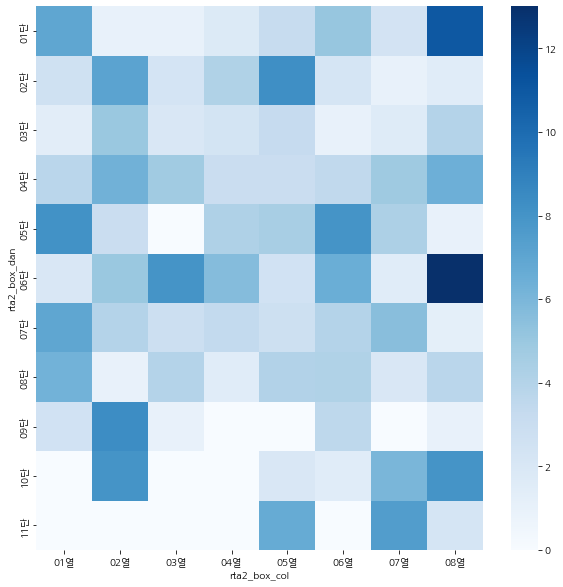

In [38]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, cmap='Blues')

In [35]:
df_pivot2=pd.pivot_table(df_error, values='error_count', index=['rta2_box_row'], columns=['rta2_box_col'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_col', ylabel='rta2_box_row'>

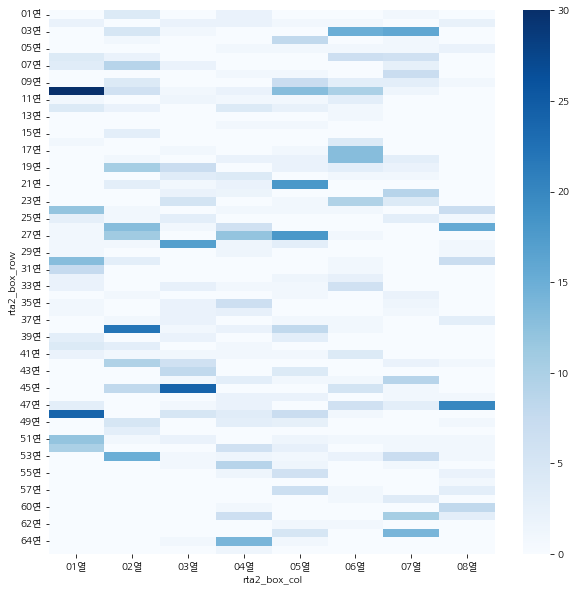

In [36]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot2, cmap='Blues')

In [41]:
df_pivot3=pd.pivot_table(df_error, values='error_count', index=['rta2_box_dan'], columns=['rta2_box_row'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_row', ylabel='rta2_box_dan'>

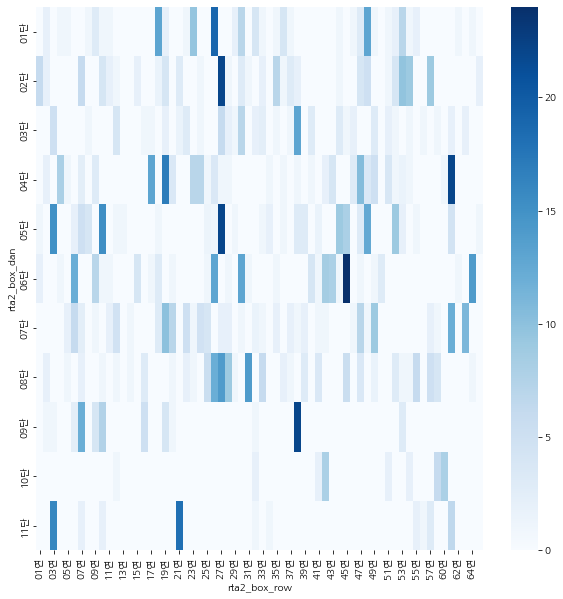

In [42]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot3, cmap='Blues')

In [43]:
df_tot

,rta2_box_col,rta2_box_row,rta2_box_dan,count
0,01열,01연,02단,50
1,01열,01연,08단,48
2,01열,01연,10단,50
3,01열,02연,02단,48
4,01열,02연,05단,50
...,...,...,...,...
836,08열,61연,04단,49
837,08열,61연,11단,50
838,08열,64연,08단,50
839,08열,65연,01단,50


In [45]:
df_error

,rta2_box_col,rta2_box_row,rta2_box_dan,error_count
0,01열,02연,02단,2
1,01열,06연,09단,4
2,01열,07연,05단,5
3,01열,07연,08단,2
4,01열,10연,05단,30
...,...,...,...,...
330,08열,56연,03단,1
331,08열,56연,11단,1
332,08열,57연,11단,3
333,08열,60연,10단,8


In [48]:
df_rate=pd.merge(df_tot, df_error, how='left', on=['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'])
df_rate.fillna(0,inplace=True)

In [49]:
df_rate.head()

,rta2_box_col,rta2_box_row,rta2_box_dan,count,error_count
0,01열,01연,02단,50,0.0
1,01열,01연,08단,48,0.0
2,01열,01연,10단,50,0.0
3,01열,02연,02단,48,2.0
4,01열,02연,05단,50,0.0


In [50]:
df_rate['rate']=((df_rate['error_count']/df_rate['count'])*100).round(2)

In [51]:
df_rate.head()

,rta2_box_col,rta2_box_row,rta2_box_dan,count,error_count,rate
0,01열,01연,02단,50,0.0,0.00
1,01열,01연,08단,48,0.0,0.00
2,01열,01연,10단,50,0.0,0.00
3,01열,02연,02단,48,2.0,4.17
4,01열,02연,05단,50,0.0,0.00


In [53]:
df_rate.drop(['count', 'error_count'], axis=1)

,rta2_box_col,rta2_box_row,rta2_box_dan,rate
0,01열,01연,02단,0.00
1,01열,01연,08단,0.00
2,01열,01연,10단,0.00
3,01열,02연,02단,4.17
4,01열,02연,05단,0.00
...,...,...,...,...
836,08열,61연,04단,0.00
837,08열,61연,11단,6.00
838,08열,64연,08단,0.00
839,08열,65연,01단,0.00


In [61]:
df_pivot4=pd.pivot_table(df_rate, values='rate', index=['rta2_box_row'], columns=['rta2_box_col'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_col', ylabel='rta2_box_row'>

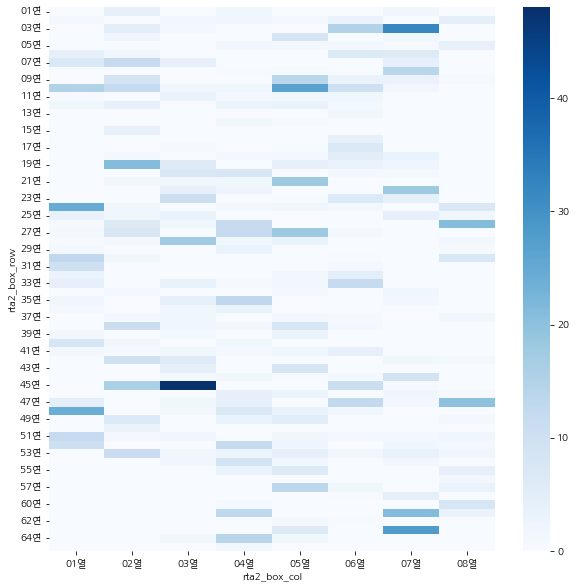

In [62]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot4, cmap='Blues')

In [63]:
df_pivot5=pd.pivot_table(df_rate, values='rate', index=['rta2_box_dan'], columns=['rta2_box_col'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_col', ylabel='rta2_box_dan'>

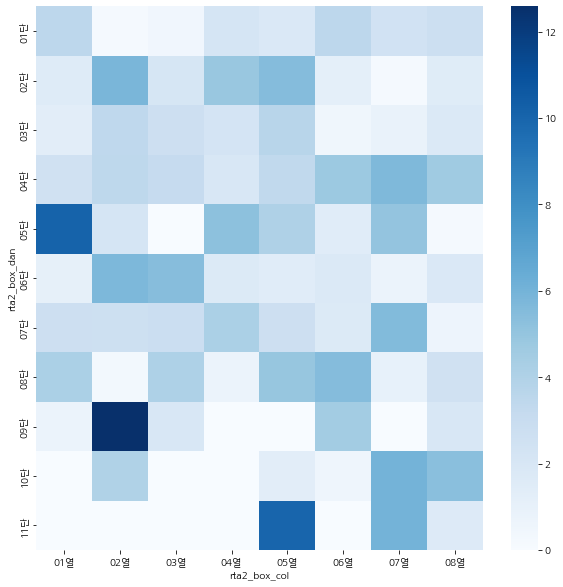

In [64]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot5, cmap='Blues')

In [65]:
df_pivot6=pd.pivot_table(df_rate, values='rate', index=['rta2_box_dan'], columns=['rta2_box_row'], fill_value=0)

<AxesSubplot:xlabel='rta2_box_row', ylabel='rta2_box_dan'>

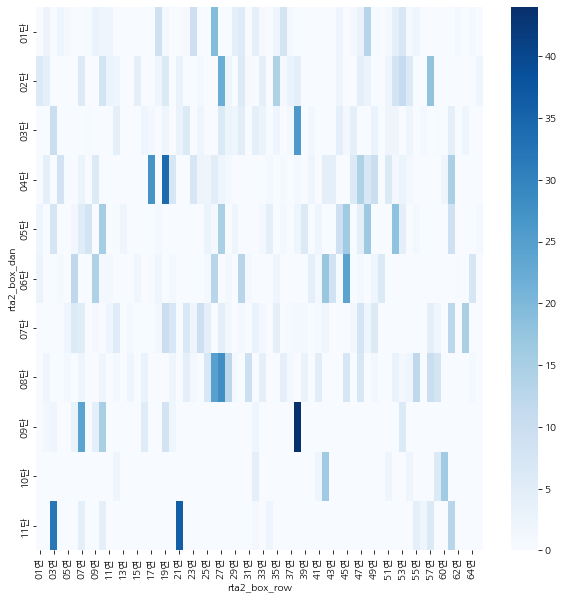

In [66]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_pivot6, cmap='Blues')